In [1]:
import numpy as np
import scipy.optimize as sp_opt
import matplotlib.pyplot as plt
%matplotlib inline

import ionic_model

In [2]:
# Data - frac factor at 300 K
cscl_beta_permil = [97.841777, 43.657763, 18.12, 8.277010]
cscl_beta_ref = 18.12
cscl_r_ang = [1.84188, 2.07212, 2.302, 2.53259]
cscl_r_ref = 2.302
mgo_beta_permil = [46.810329, 37.399128, 26.132359, 20.720653]
mgo_beta_ref = 26.132359
mgo_r_ang = [1.98311, 2.03985, 2.12726, 2.18267]
mgo_r_ref = 2.12726
nias_first_beta_permil = [90.102510, 39.837124, 26.06, 7.427218] # Oct
nias_first_beta_ref = 26.06
nias_first_r_ang = [1.80735, 2.03327, 2.140, 2.48511]
nias_first_r_ref = 2.140
nias_second_beta_permil = [87.656273, 38.203322, 23.18, 7.173067] # trig pris
nias_second_beta_ref = 23.18
nias_second_r_ang = [1.80953, 2.03573, 2.153, 2.48811]
nias_second_r_ref = 2.153
cubzns_beta_permil = [61.884101, 30.05, 13.162081, 6.337711]# , 4.557974]
cubzns_beta_ref = 30.05
cubzns_r_ang = [1.79967, 2.000, 2.19960, 2.39956]# , 2.59952]
cubzns_r_ref = 2.000

In [3]:
def calc_beta_300(r, k0, n):
    """
    Use ionic model to calculate 1000 ln beta at 300K from r with force constant offset"""
    # r into m
    r = r * 1E-10
    k = ionic_model.ionic_model_force_constant(r, offset=k0, n=n)
    beta = ionic_model.ionic_model_beta(k, 300.0)
    return beta

In [4]:
cscl_popt, cscl_pcov = sp_opt.curve_fit(calc_beta_300, cscl_r_ang, cscl_beta_permil, p0=[0, 12])
print(cscl_popt)

cubzns_popt, cubzns_pcov = sp_opt.curve_fit(calc_beta_300, cubzns_r_ang, cubzns_beta_permil, p0=[0, 12])
print(cubzns_popt)

[-1102.77354398    21.18200673]
[-759.73776929   13.2295389 ]


In [5]:
r_points = np.linspace(1.80, 2.55)

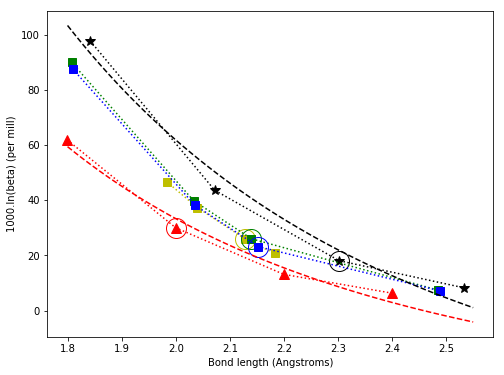

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(cscl_r_ang, cscl_beta_permil, 'k*', label='CsCl structure', linestyle=':', markersize=10)
ax.plot(cscl_r_ref, cscl_beta_ref, 'ko', fillstyle='none', markersize=20)
ax.plot(mgo_r_ang, mgo_beta_permil, 'ys', label='NaCl (periclase)', linestyle=':', markersize=8)
ax.plot(mgo_r_ref, mgo_beta_ref, 'yo', fillstyle='none', markersize=20)
ax.plot(nias_first_r_ang, nias_first_beta_permil, 'gs', label='NiAs structure (octahedral)', linestyle=':', markersize=8)
ax.plot(nias_first_r_ref, nias_first_beta_ref, 'go', fillstyle='none', markersize=20)
ax.plot(nias_second_r_ang, nias_second_beta_permil, 'bs', label='NiAs structure (trigonal prismatic)', linestyle=':', markersize=8)
ax.plot(nias_second_r_ref, nias_second_beta_ref, 'bo', fillstyle='none', markersize=20)
ax.plot(cubzns_r_ang, cubzns_beta_permil, 'r^', label='cubic ZnS structure', linestyle=':', markersize=10)
ax.plot(cubzns_r_ref, cubzns_beta_ref, 'ro', fillstyle='none', markersize=20)

ax.plot(r_points, calc_beta_300(r_points, *cscl_popt), 'k', linestyle='--')
ax.plot(r_points, calc_beta_300(r_points, *cubzns_popt), 'r', linestyle='--')


ax.set_xlabel('Bond length (Angstroms)')
ax.set_ylabel('1000.ln(beta) (per mill)')
plt.show()

In [7]:
mgo_popt, mgo_pcov = sp_opt.curve_fit(calc_beta_300, mgo_r_ang, mgo_beta_permil, p0=[0, 12])
print(mgo_popt)
r_points = np.linspace(1.90, 2.30)

[-1162.18970166    18.51025813]


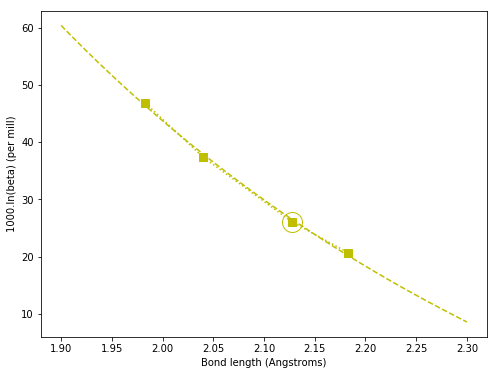

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r_points, calc_beta_300(r_points, *mgo_popt), 'y', linestyle='--')
ax.plot(mgo_r_ang, mgo_beta_permil, 'ys', label='NaCl (periclase)', linestyle=':', markersize=8)
ax.plot(mgo_r_ref, mgo_beta_ref, 'yo', fillstyle='none', markersize=20)
ax.set_xlabel('Bond length (Angstroms)')
ax.set_ylabel('1000.ln(beta) (per mill)')
plt.show()